In [65]:
! pip install html5lib
import requests
import json
import csv
import pandas as pd
from bs4 import BeautifulSoup
import html5lib
import numpy as np
from matplotlib import pyplot as plt

lat="42.098701"
lon="-75.912537"

genius=requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file=genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.0987,-75.9125',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.9125, 42.0987]},
 'properties': {'@id': 'https://api.weather.gov/p

In [66]:
forecast = json_file["properties"]["forecast"]
forecast_one = requests.get(forecast)

json = forecast_one.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9315877, 42.1111321],
    [-75.9357021, 42.0895688],
    [-75.9066508, 42.0865146],
    [-75.90253039999999, 42.1080777],
    [-75.9315877, 42.1111321]]]},
 'properties': {'updated': '2023-03-21T18:28:21+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-21T20:38:59+00:00',
  'updateTime': '2023-03-21T18:28:21+00:00',
  'validTimes': '2023-03-21T12:00:00+00:00/P8DT1H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'This Afternoon',
    'startTime': '2023-03-21T16:00:00-04:00',
    'endTime': '2023-03-21T18:00:00-04:00',


In [67]:
variable = json["properties"]["periods"]
variable

[{'number': 1,
  'name': 'This Afternoon',
  'startTime': '2023-03-21T16:00:00-04:00',
  'endTime': '2023-03-21T18:00:00-04:00',
  'isDaytime': True,
  'temperature': 56,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': None},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -3.888888888888889},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 30},
  'windSpeed': '10 mph',
  'windDirection': 'W',
  'icon': 'https://api.weather.gov/icons/land/day/few?size=medium',
  'shortForecast': 'Sunny',
  'detailedForecast': 'Sunny, with a high near 56. West wind around 10 mph.'},
 {'number': 2,
  'name': 'Tonight',
  'startTime': '2023-03-21T18:00:00-04:00',
  'endTime': '2023-03-22T06:00:00-04:00',
  'isDaytime': False,
  'temperature': 34,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': None},
  'dewpoint': {'unitCode': 'wmo

<function matplotlib.pyplot.show(close=None, block=None)>

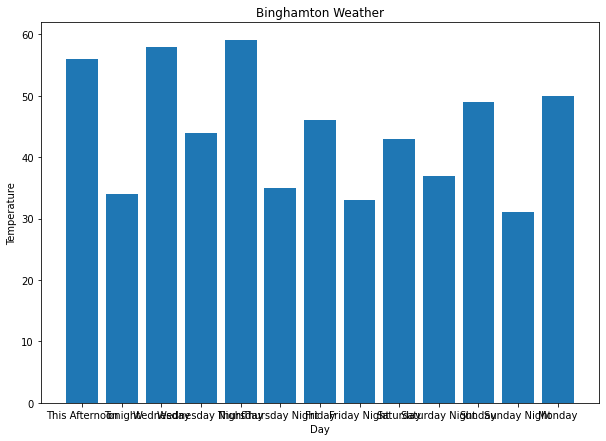

In [69]:
df=pd.DataFrame(view)

day = df["Day"]

temp= df["Temp"]

fig=plt.figure(figsize=(10,7))
plt.bar(day[0:13], temp[0:13])

plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Binghamton Weather")

plt.show

In [68]:
Lab7_csv = open("forecast.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(Lab7_csv)
csv_writer.writerow(['Day', 'Temp', 'Forecast'])

for i in variable:
    day = i["name"]
    
    temperature = i["temperature"]
    
    forecast_details = i["detailedForecast"]
    
    csv_writer.writerow([day, temperature, forecast_details])
    
Lab7_csv.close()

view = pd.read_csv("forecast.csv")
view

,Day,Temp,Forecast
0,This Afternoon,56,"Sunny, with a high near 56. West wind around 1..."
1,Tonight,34,"Mostly cloudy, with a low around 34. East wind..."
2,Wednesday,58,"Mostly cloudy, with a high near 58. South wind..."
3,Wednesday Night,44,A chance of rain showers after 3am. Mostly clo...
4,Thursday,59,"Rain showers before 2pm, then showers and thun..."
5,Thursday Night,35,"Rain showers. Cloudy, with a low around 35. Ch..."
6,Friday,46,"A chance of rain showers before 2pm. Cloudy, w..."
7,Friday Night,33,"A slight chance of rain between 8pm and 1am, t..."
8,Saturday,43,"Rain. Cloudy, with a high near 43. Chance of p..."
9,Saturday Night,37,"Rain. Mostly cloudy, with a low around 37. Cha..."


In [70]:
#cuba
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/cu")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,Triunfo de la Revolución
1,Día de Victoria de las Fuerzas Armadas
2,Good Friday
3,Día de los trabajadores
4,Conmemoración del asalto a Moncada
5,Día de la Rebeldía Nacional
6,Conmemoración del asalto a Moncada
7,Día de la Independencia
8,Navidad


In [71]:
#greece
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/gr")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,Πρωτοχρονιά
1,Θεοφάνεια
2,Καθαρά Δευτέρα
3,Ευαγγελισμός της Θεοτόκου
4,Εικοστή Πέμπτη Μαρτίου
5,Μεγάλη Παρασκευή
6,Κυριακή του Πάσχα
7,Δευτέρα του Πάσχα
8,Εργατική Πρωτομαγιά
9,Πεντηκοστή


In [72]:
#croatia
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/hr")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,Nova Godina
1,"Bogojavljenje, Sveta tri kralja"
2,Uskrs i uskrsni ponedjeljak
3,Uskrs i uskrsni ponedjeljak
4,Međunarodni praznik rada
5,Tijelovo
6,Dan antifašističke borbe
7,Dan pobjede i domovinske zahvalnosti i Dan hrv...
8,Velika Gospa
9,Dan svih svetih


In [73]:
#jamaica
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/jm")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,New Year's Day
1,Ash Wednesday
2,Good Friday
3,Easter Monday
4,Labour Day
5,Emancipation Day
6,Independence Day
7,National Heroes Day
8,Christmas Day
9,Boxing Day


In [74]:
#iceland
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/is")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,Nýársdagur
1,Skírdagur
2,Sumardagurinn fyrsti
3,Föstudagurinn langi
4,Páskadagur
5,Annar í páskum
6,Verkalýðsdagurinn
7,Uppstigningardagur
8,Hvítasunnudagur
9,Annar í hvítasunnu


In [75]:
#japan
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/jp")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,元日
1,成人の日
2,建国記念の日
3,春分の日
4,昭和の日
5,憲法記念日
6,みどりの日
7,こどもの日
8,海の日
9,山の日


In [76]:
#morocco
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/mc")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,Le jour de l’An
1,La Sainte Dévote
2,Easter Monday
3,Le 1er mai
4,L’Ascension
5,Le lundi de Pentecôte
6,La Fête Dieu
7,L'Assomption de Marie
8,La Toussaint
9,La Fête du Prince


In [77]:
#turkey
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/tr")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,Yılbaşı
1,Kurban Bayramı 1. Gün
2,Kurban Bayramı 2. Gün
3,Kurban Bayramı 3. Gün
4,Kurban Bayramı 4. Gün
5,Ulusal Egemenlik ve Çocuk Bayramı
6,İşçi Bayramı
7,"Atatürk'ü Anma, Gençlik ve Spor Bayramı"
8,Zafer Bayramı
9,Cumhuriyet Bayramı


In [78]:
#el salvador
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/sv")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,Día del trabajo
1,Día de la Cru
2,Día del Soldado
3,Día de las Madres
4,Día del Padre
5,Fiestas de agosto
6,Fiestas de agosto
7,Fiestas de agosto
8,Fiestas de agosto
9,Fiestas de agosto


In [79]:
#uruguay
publicholiday = requests.get("https://date.nager.at/api/v3/PublicHolidays/2000/uy")
json_file2 = publicholiday.json()
json_file2

holiday_csv =open("holiday.csv", "w", newline ="", encoding ="utf-8")
csv_writer =csv.writer(holiday_csv)
csv_writer.writerow(["Holiday"])

for i in json_file2:
    holiday = i["localName"]
    
    csv_writer.writerow([holiday])
holiday_csv.close()


view2 = pd.read_csv("holiday.csv")
view2

,Holiday
0,Año Nuevo
1,Día de los Niños
2,Carnaval
3,Carnaval
4,Desembarco de los 33 Orientales
5,Semana de Turismo
6,Semana de Turismo
7,Día de los Trabajadores
8,Batalla de las Piedras
9,Natalicio de Artigas y Día del Nunca Más


<function matplotlib.pyplot.show(close=None, block=None)>

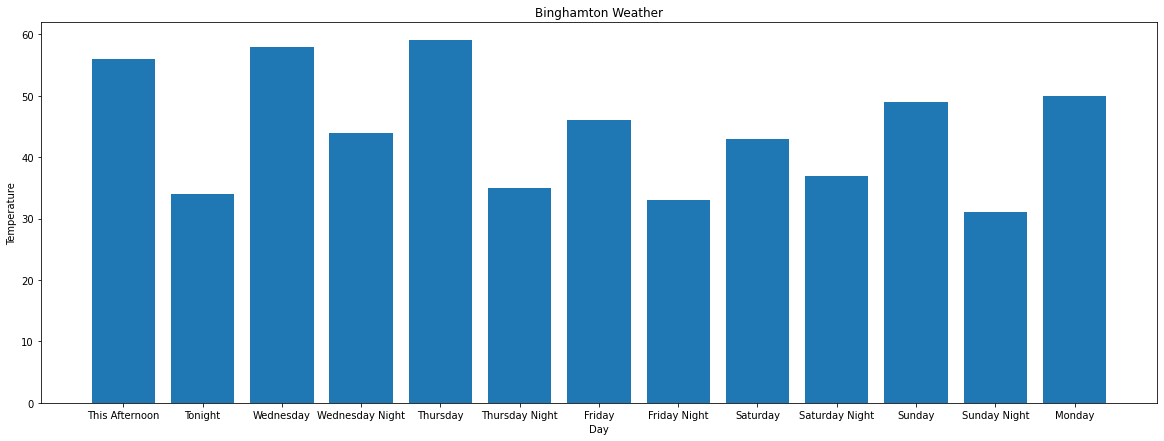

In [80]:
#Bonus 1 fix crowding.
df = pd.DataFrame(view)

day = df["Day"]
temperature =df["Temp"]

fig=plt.figure(figsize=(20,7)) #increased the figsize to increase space in the plot
plt.bar(day[0:13], temp[0:13])

plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Binghamton Weather")

plt.show
